<a href="https://colab.research.google.com/github/realalyeasin/Deep-Learning/blob/main/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libaries

In [12]:
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_datasets as tfds

import matplotlib.pyplot as plt

In [13]:
print("Version : ", tf.__version__)
print("Eager Mode : ", tf.executing_eagerly())
print("Hub Version : ", hub.__version__)
print("GPU is", "available" if tf.config.list_physical_devices("GPU") else "NOT AVAILABLE")

Version :  2.8.0
Eager Mode :  True
Hub Version :  0.12.0
GPU is NOT AVAILABLE


Loading Dataset

In [14]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train","test"],batch_size=-1, as_supervised=True)
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

Exploring Data

In [16]:
print("Training Data: {}, Testing Data {}".format(len(train_examples), len(test_examples)))

Training Data: 25000, Testing Data 25000


In [17]:
train_examples[:20]

array([b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.",
       b'I have been known to fall asleep during films, but this is usually due to a combination of things including, really tired, being warm and comfortable on the sette and having just eaten a lot. However on this occasion I fell asleep because the film was rubbish. The plot 

In [18]:
train_labels[:20]

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0])

Building The Model

In [19]:
model = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(model, input_shape=[], dtype=tf.string, trainable=True)
hub_layer(train_examples[:5])

<tf.Tensor: shape=(5, 50), dtype=float32, numpy=
array([[ 5.42319477e-01, -1.19017037e-02,  6.33753762e-02,
         6.86297193e-02, -1.67768374e-01, -1.05811745e-01,
         1.68653026e-01, -4.99882400e-02, -3.11480552e-01,
         7.91034624e-02,  1.54422626e-01,  1.48866158e-02,
         3.93015295e-02,  1.97727114e-01, -1.22154757e-01,
        -4.12098095e-02, -2.70410895e-01, -2.19221517e-01,
         2.65176624e-01, -8.07390749e-01,  2.58335322e-01,
        -3.10042113e-01,  2.86832154e-01,  1.94338694e-01,
        -2.90364921e-01,  3.86284851e-02, -7.84441113e-01,
        -4.79324013e-02,  4.11029905e-01, -3.63888919e-01,
        -5.80347061e-01,  3.02694559e-01,  3.63089710e-01,
        -1.52271643e-01, -4.43915039e-01,  1.94629967e-01,
         1.95284083e-01,  5.66623397e-02,  2.89070398e-01,
        -2.84683228e-01, -5.31205582e-03,  5.71938045e-02,
        -3.20131809e-01, -4.41866480e-02, -8.55078250e-02,
        -5.58474362e-01, -2.33363912e-01, -2.07829520e-01,
       

In [20]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 50)                48190600  
                                                                 
 dense (Dense)               (None, 16)                816       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 48,191,433
Trainable params: 48,191,433
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.0, name='accuracy')])

Validation

In [23]:
x_val = train_examples[:10000]
partial_x_train = train_examples[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

Training The Model

In [26]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val,y_val),
                    verbose=1)

Epoch 1/10
30/30 [==============================] - 20s 662ms/step - loss: 0.1884 - accuracy: 0.9417 - val_loss: 0.3106 - val_accuracy: 0.8704
Epoch 2/10
30/30 [==============================] - 21s 671ms/step - loss: 0.1425 - accuracy: 0.9607 - val_loss: 0.3031 - val_accuracy: 0.8735
Epoch 3/10
30/30 [==============================] - 21s 688ms/step - loss: 0.1045 - accuracy: 0.9757 - val_loss: 0.3036 - val_accuracy: 0.8741
Epoch 4/10
30/30 [==============================] - 18s 611ms/step - loss: 0.0762 - accuracy: 0.9856 - val_loss: 0.3096 - val_accuracy: 0.8759
Epoch 5/10
30/30 [==============================] - 18s 614ms/step - loss: 0.0548 - accuracy: 0.9922 - val_loss: 0.3192 - val_accuracy: 0.8736
Epoch 6/10
30/30 [==============================] - 18s 601ms/step - loss: 0.0397 - accuracy: 0.9963 - val_loss: 0.3315 - val_accuracy: 0.8727
Epoch 7/10
30/30 [==============================] - 19s 628ms/step - loss: 0.0290 - accuracy: 0.9983 - val_loss: 0.3423 - val_accuracy: 0.8718

Evaluating The Model

In [28]:
results = model.evaluate(test_examples, test_labels)
print(results)

782/782 [==============================] - 59s 76ms/step - loss: 0.4154 - accuracy: 0.8552
[0.41541486978530884, 0.855239987373352]


In [29]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

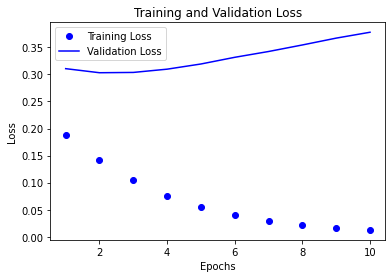

In [30]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

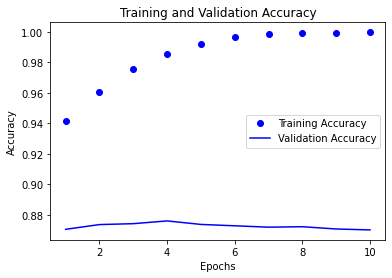

In [31]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()